<a href="https://colab.research.google.com/github/dimLMT/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
- Author: Mengtian Liu


## Project Overview
- sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

## Load and Inspect Data

- Use Pandas to read the sales prediction data set into Google Colab.
  
- Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.


In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')
#load file
import numpy as np
import pandas as pd

fpath = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df = pd.read_csv(fpath)
df.info()
print('\n\n')
df.head()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB





,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data
- Explore the data - what do you need to do to clean this data? Clean it!
- Be sure to address each of the following tasks:

1) How many rows and columns?

2) What are the datatypes of each variable?

In [2]:
df.shape

(8523, 12)

In [3]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3) Are there duplicates? If so, drop any duplicates.

4) Identify missing values.

In [4]:
df.duplicated().sum()

0

In [5]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5) Address the missing values by using a placeholder value.

6) Confirm that there are no missing values after addressing them.

In [6]:
df['Item_Weight'] = df['Item_Weight'].fillna(-1)

In [7]:
df['Outlet_Size'] = df['Outlet_Size'].fillna('MISSING')

In [8]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).


In [9]:
cat_cols = df.select_dtypes('object').columns
for cols in cat_cols:
  print(df[cols].value_counts(),'\n')

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64 

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64 

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64 

Mediu

In [10]:
consis_dict = {'LF':'Low Fat', 'reg': 'Regular', 'low fat':'Low Fat'}
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(consis_dict)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [11]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


 The **Item_Weight** column already has -1 placeholder values



## Exploratory Data Analysis

Next task is to create exploratory visuals that might help you understand, explain, or model your data. This must include at least one of each:

- Histograms to view the distributions of numerical features in your dataset.

- Boxplots to view statistical summaries of numerical features in your dataset.

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
num_cols = df.select_dtypes('number').columns
len(num_cols)

5

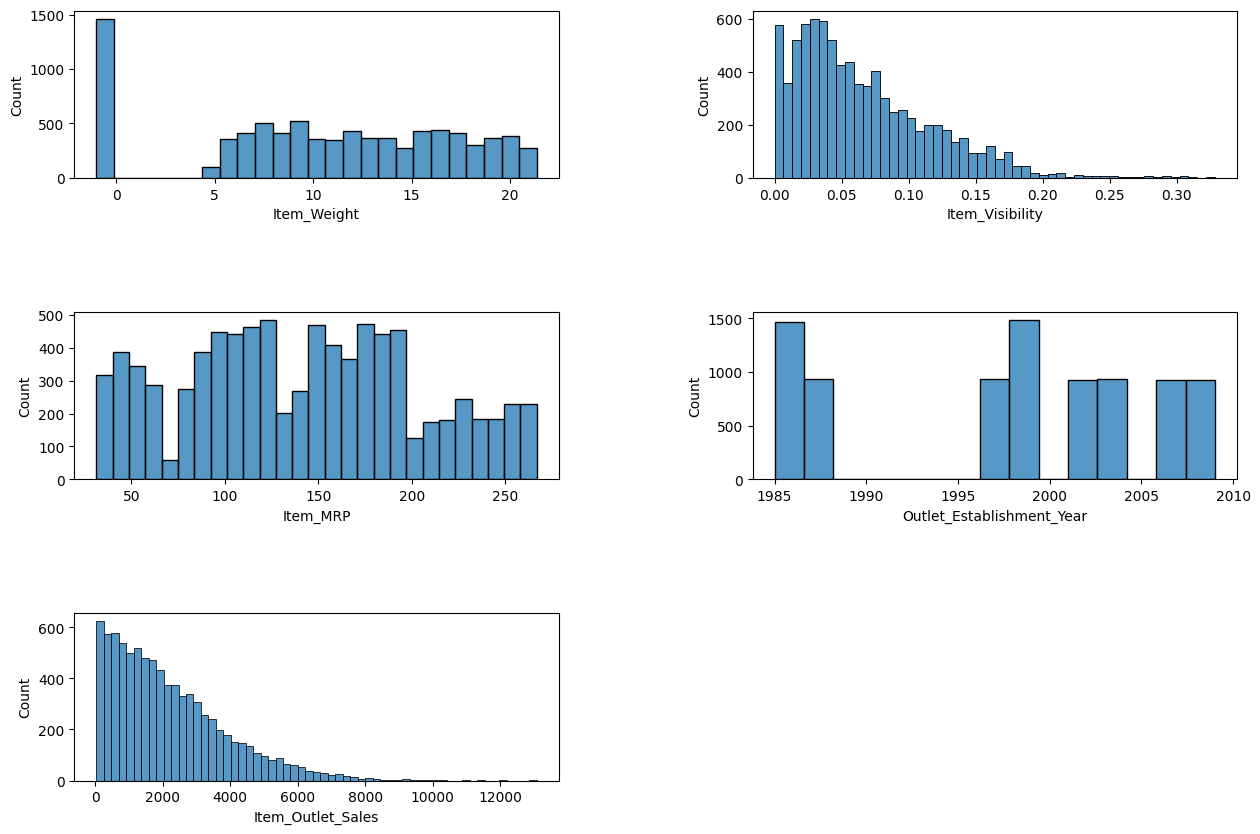

In [13]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.8)
for n, col in enumerate(num_cols):
  ax = plt.subplot(3, 2, n + 1)
  ax = sns.histplot(data=df, x=col);


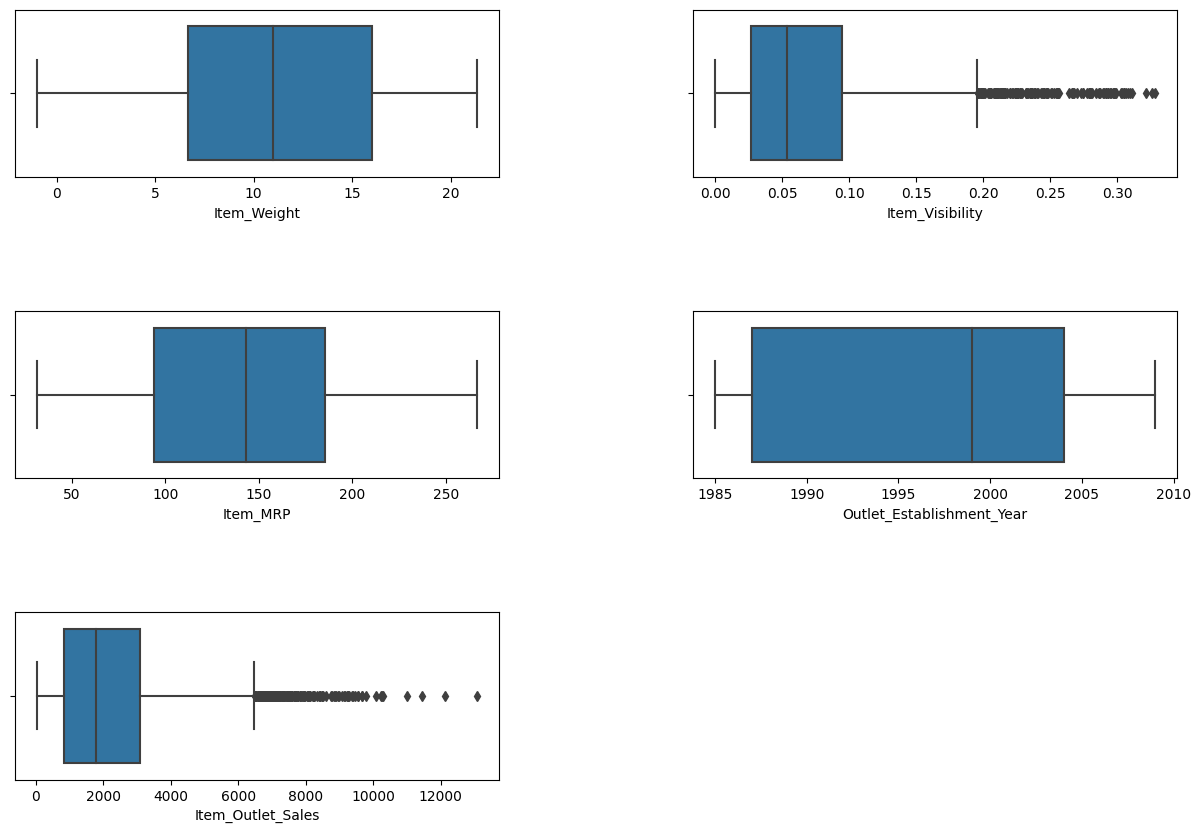

In [14]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.8)
for n, col in enumerate(num_cols):
  ax = plt.subplot(3, 2, n + 1)
  ax = sns.boxplot(data=df, x=col);


- Countplots to view the frequency of each class of categorial features in your dataset.

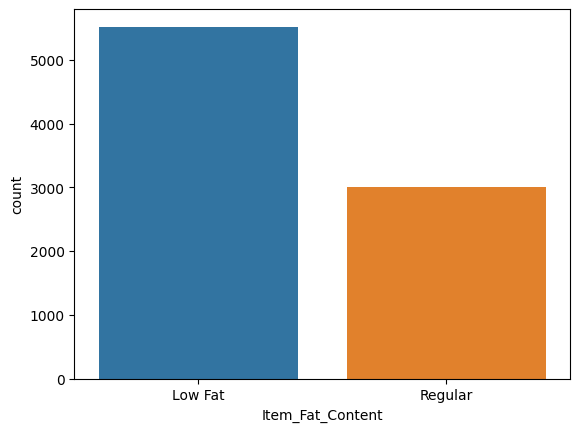

In [15]:
ax1 = sns.countplot(data=df, x='Item_Fat_Content')

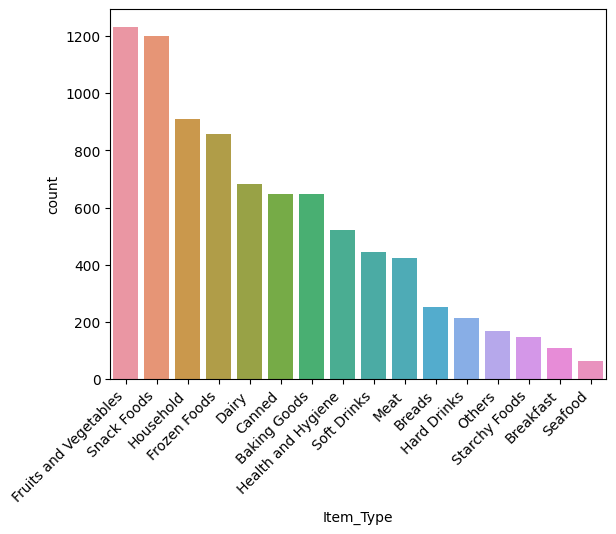

In [16]:
reorder_tick = df['Item_Type'].value_counts().index
ax2 = sns.countplot(data=df, x='Item_Type', order=reorder_tick)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right');

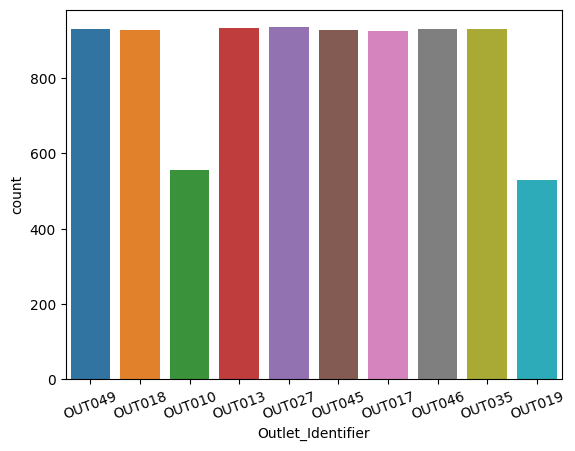

In [17]:
ax3 = sns.countplot(data=df, x='Outlet_Identifier')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=20);

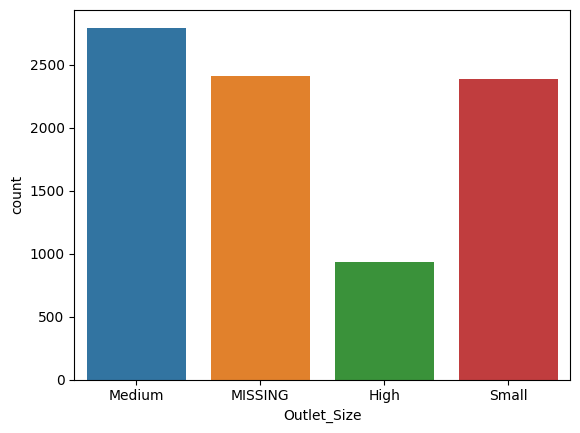

In [18]:
ax4 = sns.countplot(data=df,x='Outlet_Size')

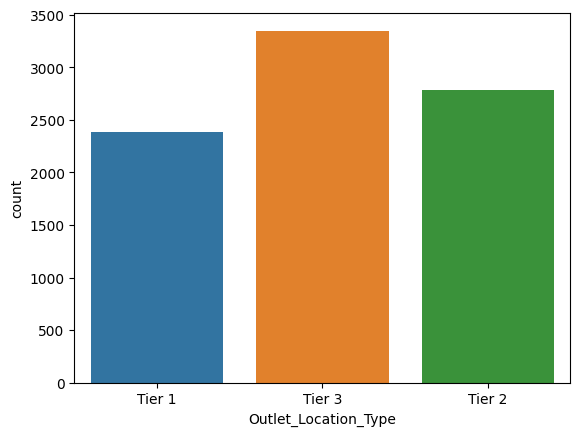

In [19]:
ax5 = sns.countplot(data=df,x='Outlet_Location_Type')

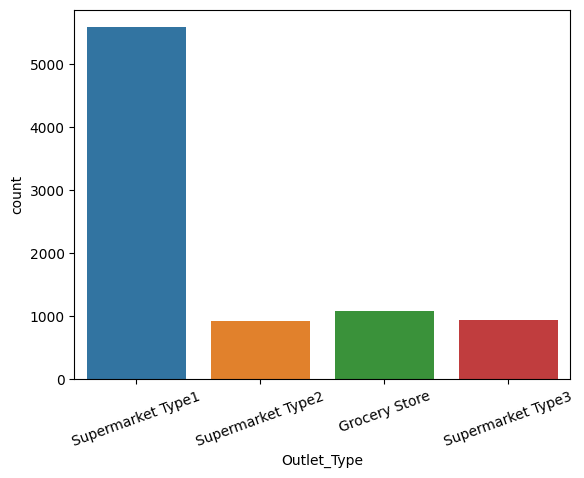

In [20]:
ax6 = sns.countplot(data=df, x='Outlet_Type')
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=20);

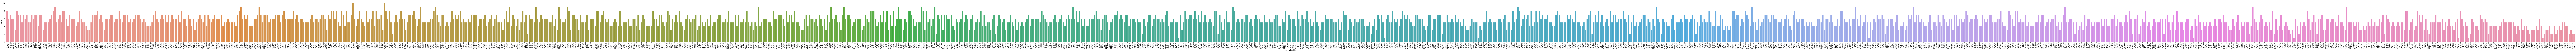

In [21]:
ax7 = sns.countplot(data=df, x='Item_Identifier')
ax7.figure.set_figwidth(300,20)
ax7.tick_params(axis='x', rotation=90);

- Heatmap to view the correlation between features.

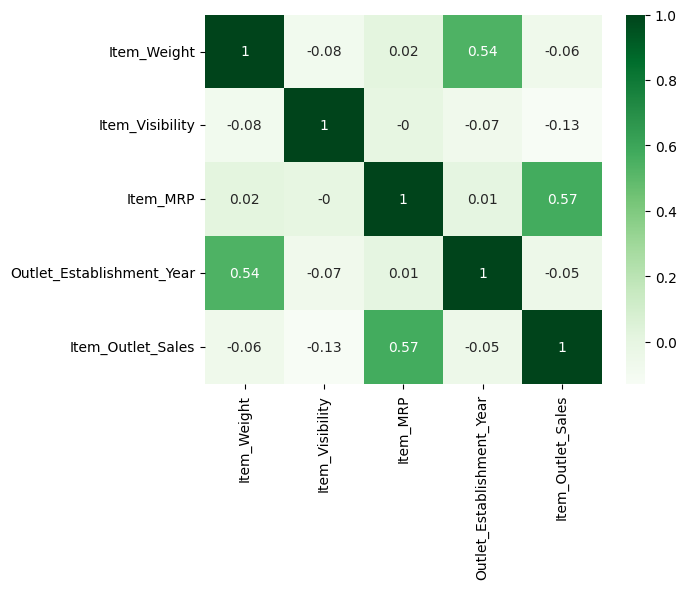

In [22]:
corr = df.corr(numeric_only=True).round(2)
ax = sns.heatmap(corr, cmap='Greens', annot=True);

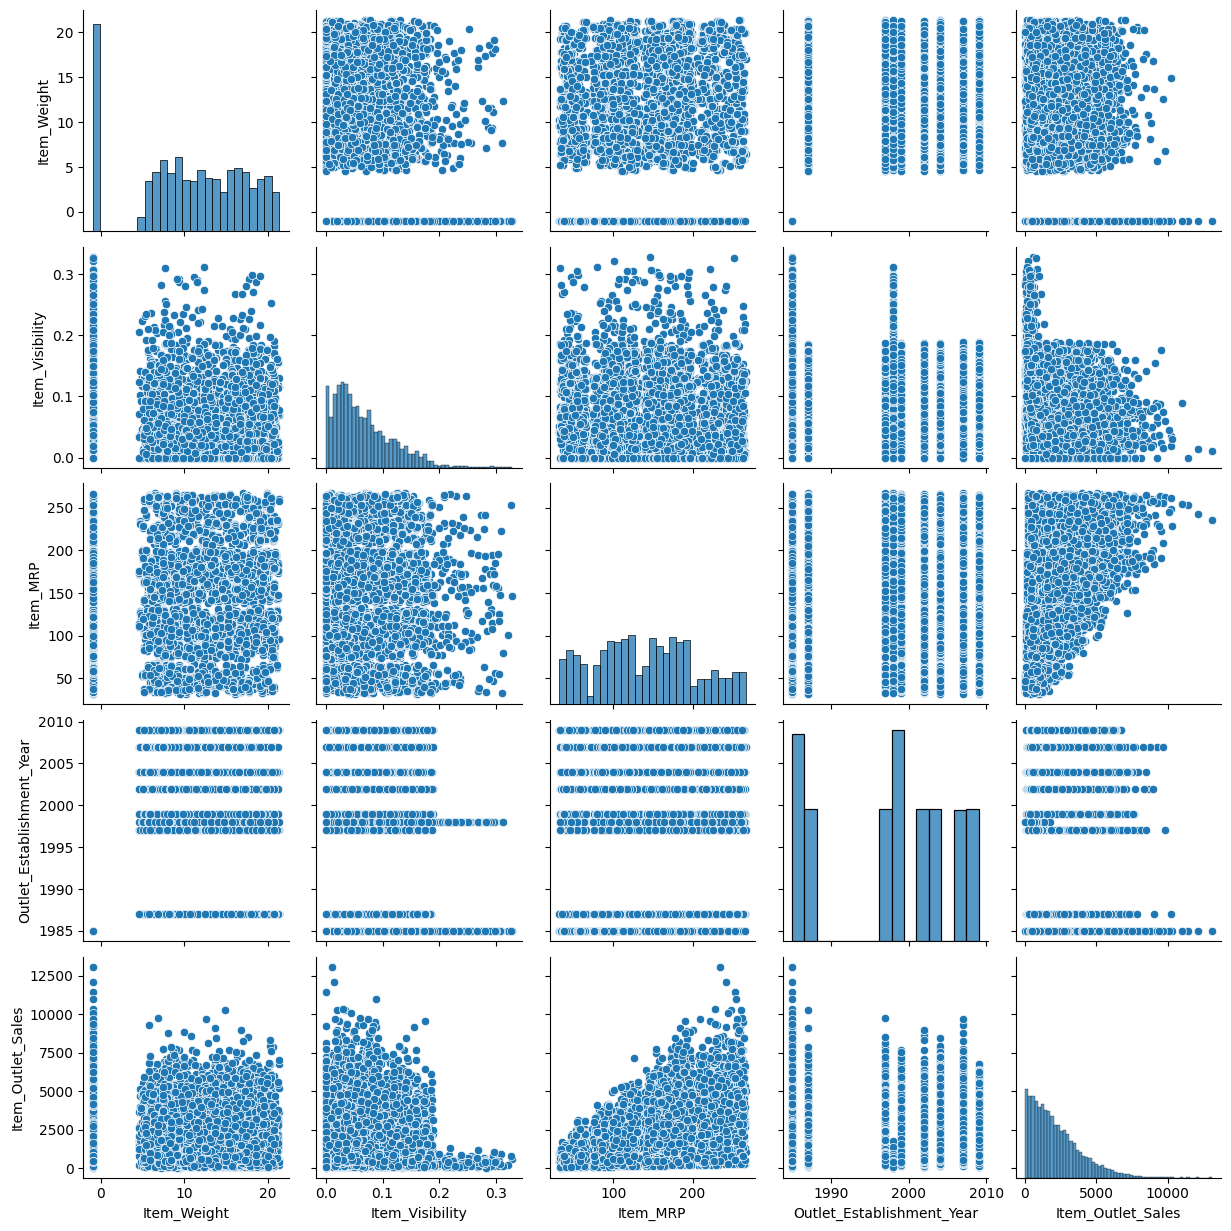

In [23]:
ax = sns.pairplot(df)

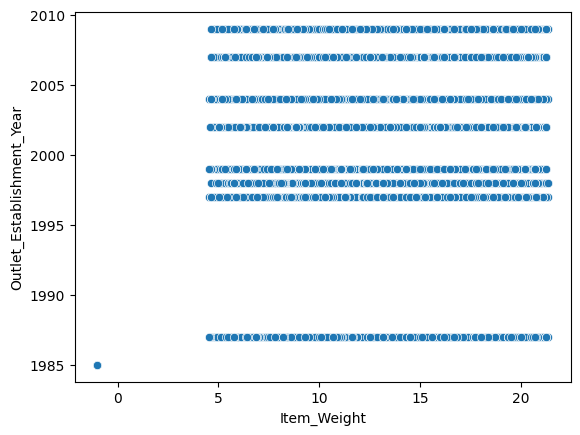

In [24]:
ax = sns.scatterplot(data=df, y='Outlet_Establishment_Year', x='Item_Weight')

The **Item_Weight** has placeholder values of -1 for the year 1985. Otherwise, there should be no correlation.

## Feature Inspection


*The target is Item_Outlet_Sales.*

Item_Outlet_Sales	: Sales of the product in the particular store. This is the target variable to be predicted.

For feature inspection, we want to remove the placeholders added in the numeric column and replace them with null values.

In [31]:
target = 'Item_Outlet_Sales'
df['Item_Weight'] = df['Item_Weight'].replace(-1, np.nan)
df['Item_Weight'].value_counts(dropna=False)

NaN       1463
12.150      86
17.600      82
13.650      77
11.800      76
          ... 
7.275        2
7.685        1
9.420        1
6.520        1
5.400        1
Name: Item_Weight, Length: 416, dtype: int64

#### 1)Feature Name: definition from data dictionary -> Item_Identifier: Product ID

The cardinality is extremely high (>10).

#### 2)Feature Name: definition from data dictionary -> Item_Weight: Weight of product

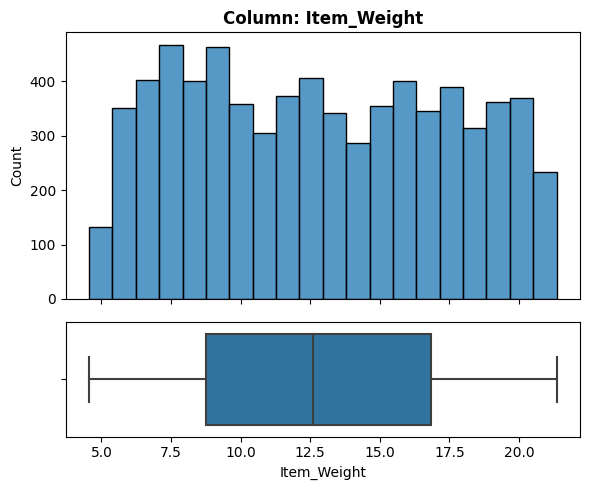

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [32]:
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

## Call Univariate Numerical EDA function
explore_numeric(df, 'Item_Weight');

**1. What type of feature is it? (nominal, ordinal, numeric)**
  - This feature is numeric.

**2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)**
  - There are 1463 null values, or 17.17% of values.

**3. Is the feature constant or quasi-constant?**
  - The feature is neither constant nor quasi-constant.

**4. What is the cardinality? Is it high (>10)?**
  - N/A (numeric)

**5. Would we know this feature before the target is determined?**
  - Yes.

**6. Is there a business case/understanding reason to exclude based on our business case?**
  - No.

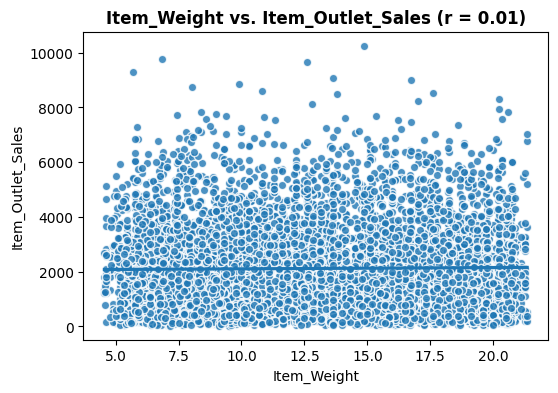

In [34]:
def plot_numeric_vs_target(df, x, y=target,
                           figsize=(6,4)):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

## Call Multivariate Numerical EDA function
plot_numeric_vs_target(df, 'Item_Weight');

**1. Based on your business understanding, would you expect this feature to be a predictor of the target?**
   - Yes

**2. Does this feature appear to be a predictor of the target?**
  - No, there is no correlation (r = 0.01) between the feature and the target.

#### 3)Feature Name: definition from data dictionary -> Item_Fat_Content: Whether the product is low-fat or regular


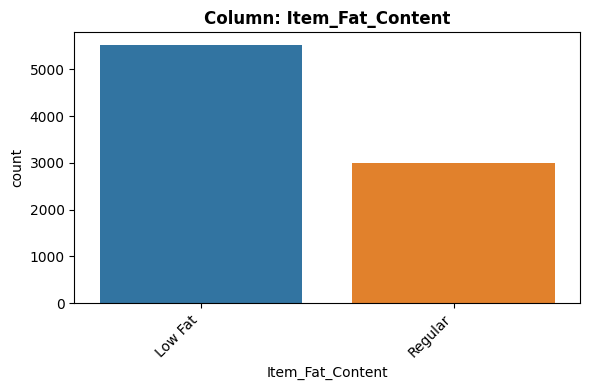

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [42]:
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

## Call Univariate Categorical EDA function
explore_categorical(df, 'Item_Fat_Content');

**1. What type of feature is it? (nominal, ordinal, numeric)**
  - This feature is nominal.

**2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)**
  - There are 0 null values, or 0% of values.

**3. Is the feature constant or quasi-constant?**
  - The feature is neither constant nor quasi-constant.

**4. What is the cardinality? Is it high (>10)?**
  - 5, not high.

**5. Would we know this feature before the target is determined?**
  - Yes.

**6. Is there a business case/understanding reason to exclude based on our business case?**
  - No.

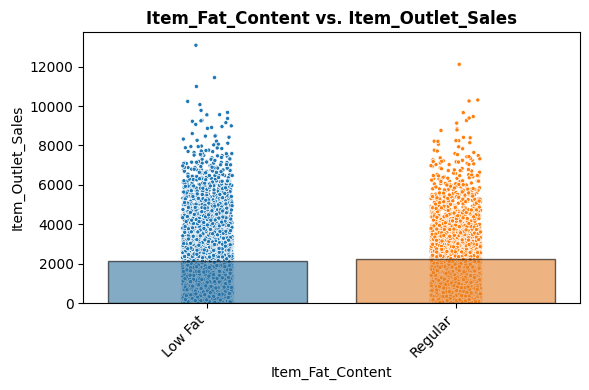

In [44]:
def plot_categorical_vs_target(df, x, y=target,figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax

## Call Multivariate Categorical EDA function
plot_categorical_vs_target(df, 'Item_Fat_Content');


**1. Based on your business understanding, would you expect this feature to be a predictor of the target?**
   - Yes

**2. Does this feature appear to be a predictor of the target?**
  - No, the group means and the range of outlet sales are similar.

#### 4)Feature Name: definition from data dictionary -> Item_Visibility: The percentage of total display area of all products in a store allocated to the particular product

In [45]:
feature = 'Item_Visibility'
df[feature].dtypes

dtype('float64')

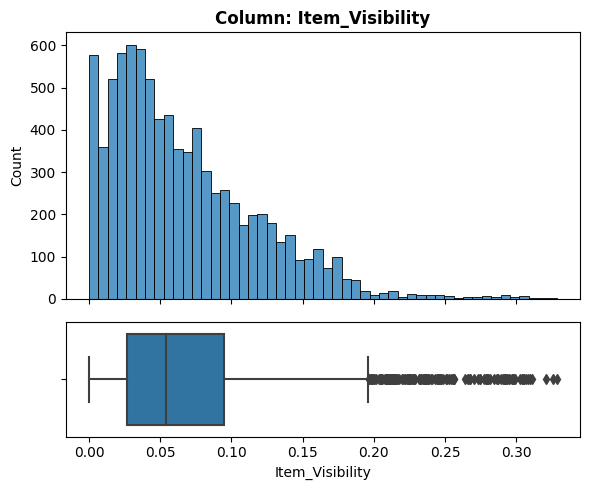

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [46]:
explore_numeric(df, feature);

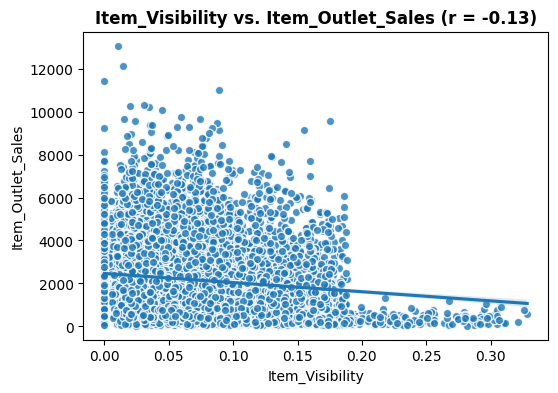

In [47]:
plot_numeric_vs_target(df, feature);

**Does this feature appear to be a predictor of the target?**
  - Possibly, the sales drop when visibility goes above ~ 0.2.

#### 5)Feature Name: definition from data dictionary -> Item_Type: The category to which the product belongs

In [48]:
feature = 'Item_Type'
df[feature].dtypes

dtype('O')

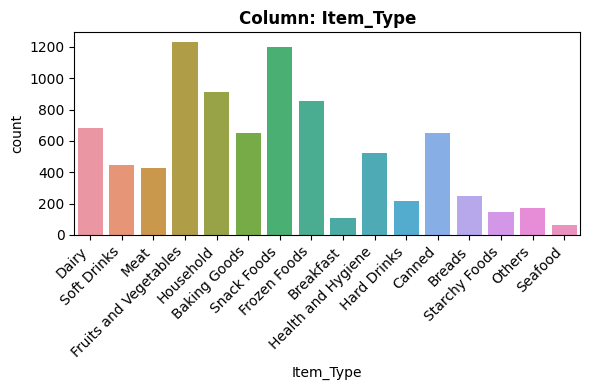

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [49]:
explore_categorical(df, feature);

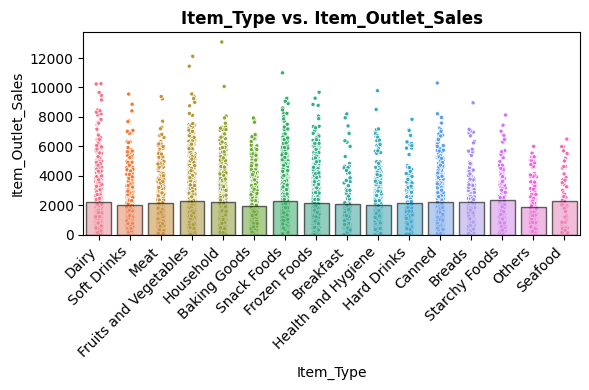

In [50]:
plot_categorical_vs_target(df, feature);

**Does this feature appear to be a predictor of the target?**
  - Unlikely, the group means are similar.

#### 6)Feature Name: definition from data dictionary -> Item_MRP: Maximum Retail Price (list price) of the product


In [51]:
feature = 'Item_MRP'
df[feature].dtypes

dtype('float64')

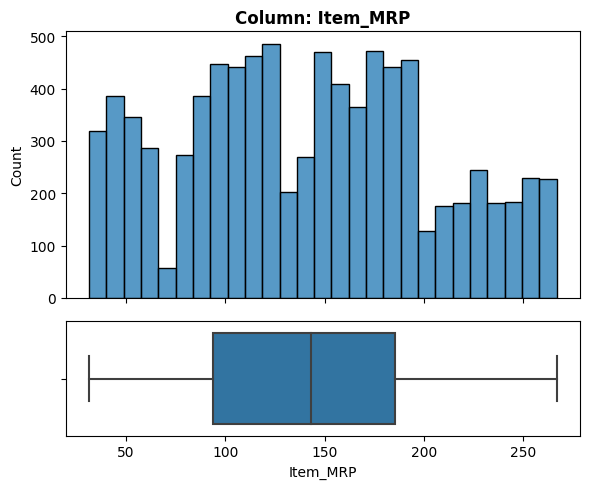

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [52]:
explore_numeric(df, feature);

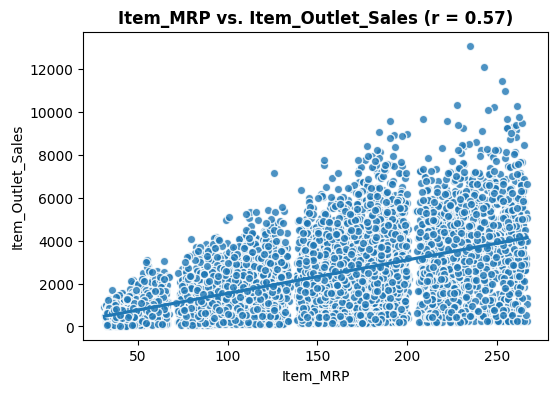

In [53]:
plot_numeric_vs_target(df, feature);

**Does this feature appear to be a predictor of the target?**
  - Yes,  there is a moderate positive correlation (r = 0.57) between the feature and the target.

#### 7)Feature Name: definition from data dictionary -> Outlet_Identifier: Store ID

In [58]:
feature = 'Outlet_Identifier'
df[feature].dtypes

dtype('O')

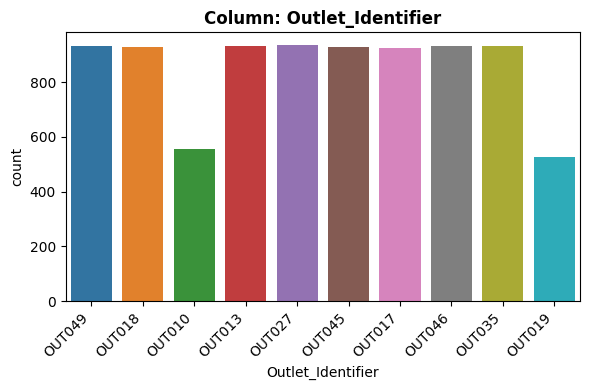

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [59]:
explore_categorical(df, feature);

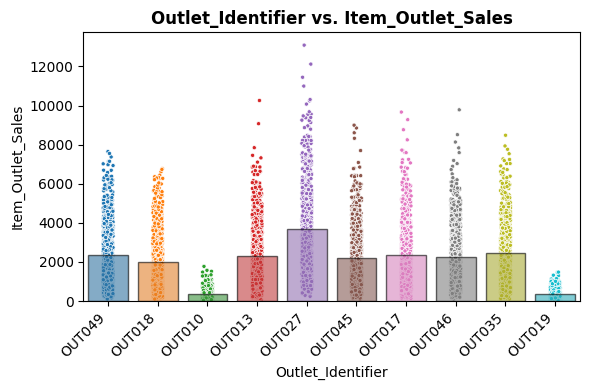

In [60]:
plot_categorical_vs_target(df, feature);

**Does this feature appear to be a predictor of the target?**
  - Yes, the group means and the range of outlet sales exhibit noticeable differences.

#### 8)Feature Name: definition from data dictionary -> Outlet_Establishment_Year: The year in which store was established

In [54]:
feature = 'Outlet_Establishment_Year'
df[feature].dtypes

dtype('int64')

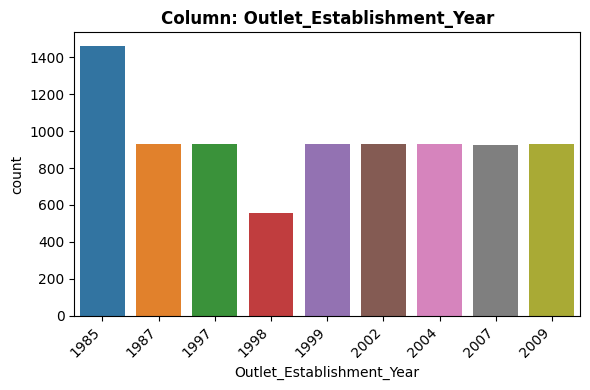

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [56]:
explore_categorical(df, feature);

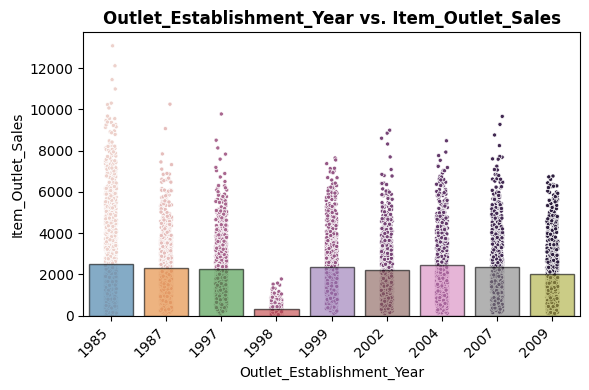

In [57]:
plot_categorical_vs_target(df, feature);

**Does this feature appear to be a predictor of the target?**
  - Yes, the data for 1998 is significantly distinct.

#### 9)Feature Name: definition from data dictionary -> Outlet_Size: The size of the store in terms of ground area covered

In [66]:
feature = 'Outlet_Size'
df[feature].dtypes

dtype('O')

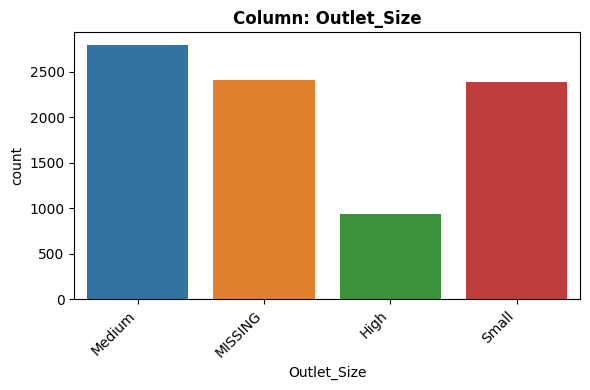

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [67]:
explore_categorical(df, feature);

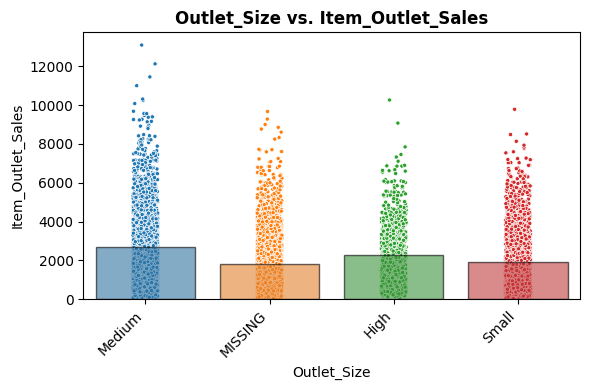

In [68]:
plot_categorical_vs_target(df, feature);

**Does this feature appear to be a predictor of the target?**
  - No, the group means and the range of outlet sales are similar. Plus, too many missing values.

#### 10)Feature Name: definition from data dictionary -> Outlet_Location_Type: The type of area in which the store is located

In [69]:
feature = 'Outlet_Location_Type'
df[feature].dtypes

dtype('O')

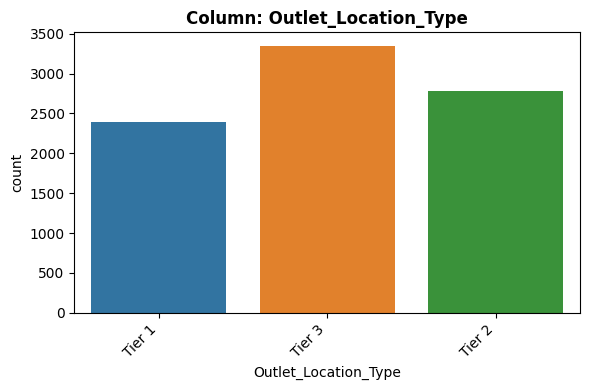

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [70]:
explore_categorical(df, feature);

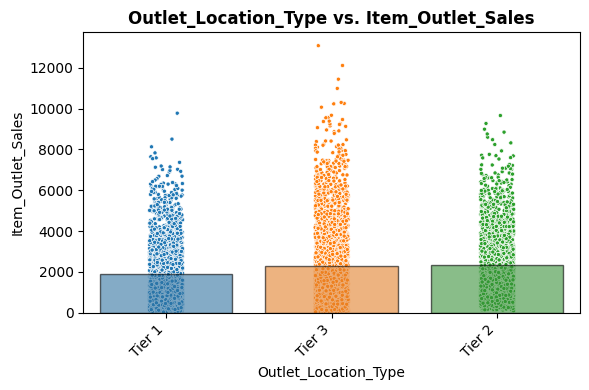

In [71]:
plot_categorical_vs_target(df, feature);

**Does this feature appear to be a predictor of the target?**
  - Possibly, there is some variation in the range of outlet sales.

#### 11)Feature Name: definition from data dictionary -> Outlet_Type: Whether the outlet is a grocery store or some sort of supermarket

In [72]:
feature = 'Outlet_Type'
df[feature].dtypes

dtype('O')

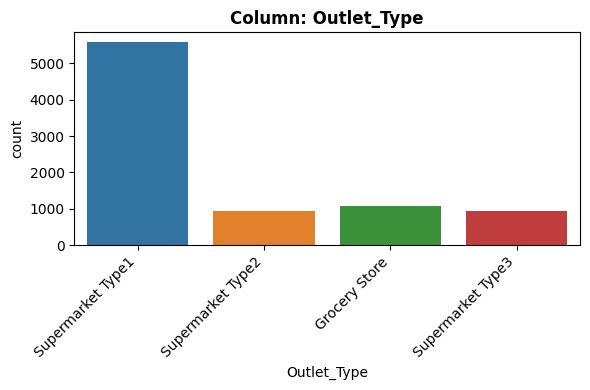

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [73]:
explore_categorical(df, feature);

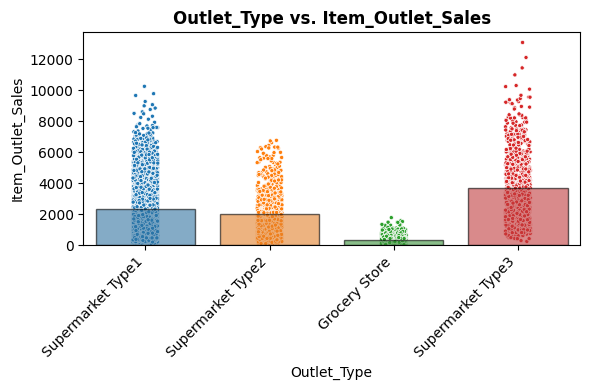

In [74]:
plot_categorical_vs_target(df, feature);

**Does this feature appear to be a predictor of the target?**
  - Yes, the grocery store yields distinct results.